<a href="https://colab.research.google.com/github/LevTG/Xtest/blob/main/Xtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tifffile
!pip install celluloid
!apt install ffmpeg
!apt install imagemagick

In [114]:
import re

import numpy as np
import tifffile
import matplotlib.pyplot as plt
 
%matplotlib inline

# Чтение файлов

In [115]:
filename = '/content/drive/MyDrive/Colab Notebooks/Xtest/Xtest.tiff'
frames = tifffile.imread(filename)

In [116]:
frames.shape

(670, 160, 170)

In [117]:
frames[0]

array([[249, 285, 379, ..., 213, 333, 421],
       [314, 304, 371, ..., 270, 355, 427],
       [296, 216, 360, ..., 290, 360, 298],
       ...,
       [239, 309, 298, ..., 305, 294, 257],
       [282, 293, 288, ..., 274, 363, 340],
       [348, 326, 321, ..., 342, 416, 385]], dtype=uint16)

Вычитание среднего

In [118]:
mean_frame = np.mean(frames, axis=0)
mean_frames = np.subtract(frames, mean_frame)
mean_frames.shape

(670, 160, 170)

Кадр -> Вектор

In [119]:
reshaped_frames = mean_frames.reshape((mean_frames.shape[0], -1))
reshaped_frames.shape

(670, 27200)

Сингулярное разложение

In [120]:
time_comp, s, spatial_comp = np.linalg.svd(reshaped_frames, full_matrices=False)

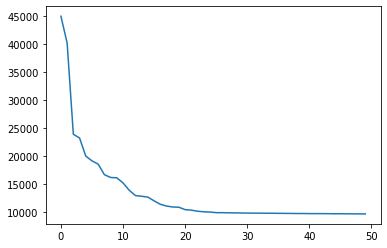

In [121]:
plt.plot(s[:50])


### Временные компоненты

In [122]:
time_comp.shape

(670, 670)

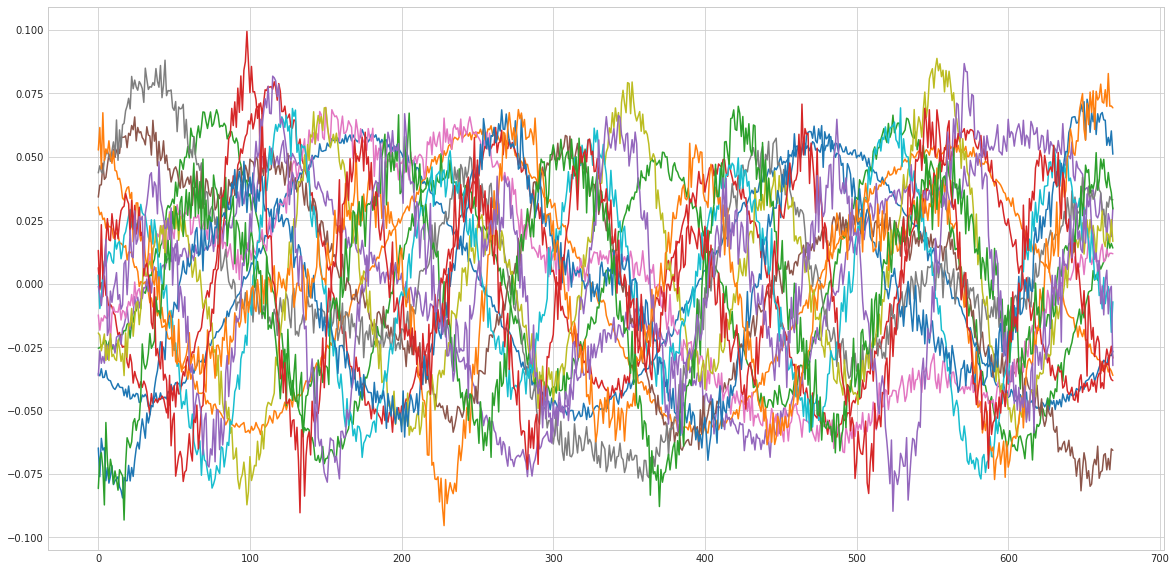

In [123]:
fig = plt.figure(figsize=(20, 10))
with plt.style.context('seaborn-whitegrid'):
    plt.plot(time_comp[:, :15])
plt.show()

Все графики периодичны,

Что логично

Ведь реакция циклична

### Пространственные компоненты

In [124]:
spatial_comp.shape

(670, 27200)

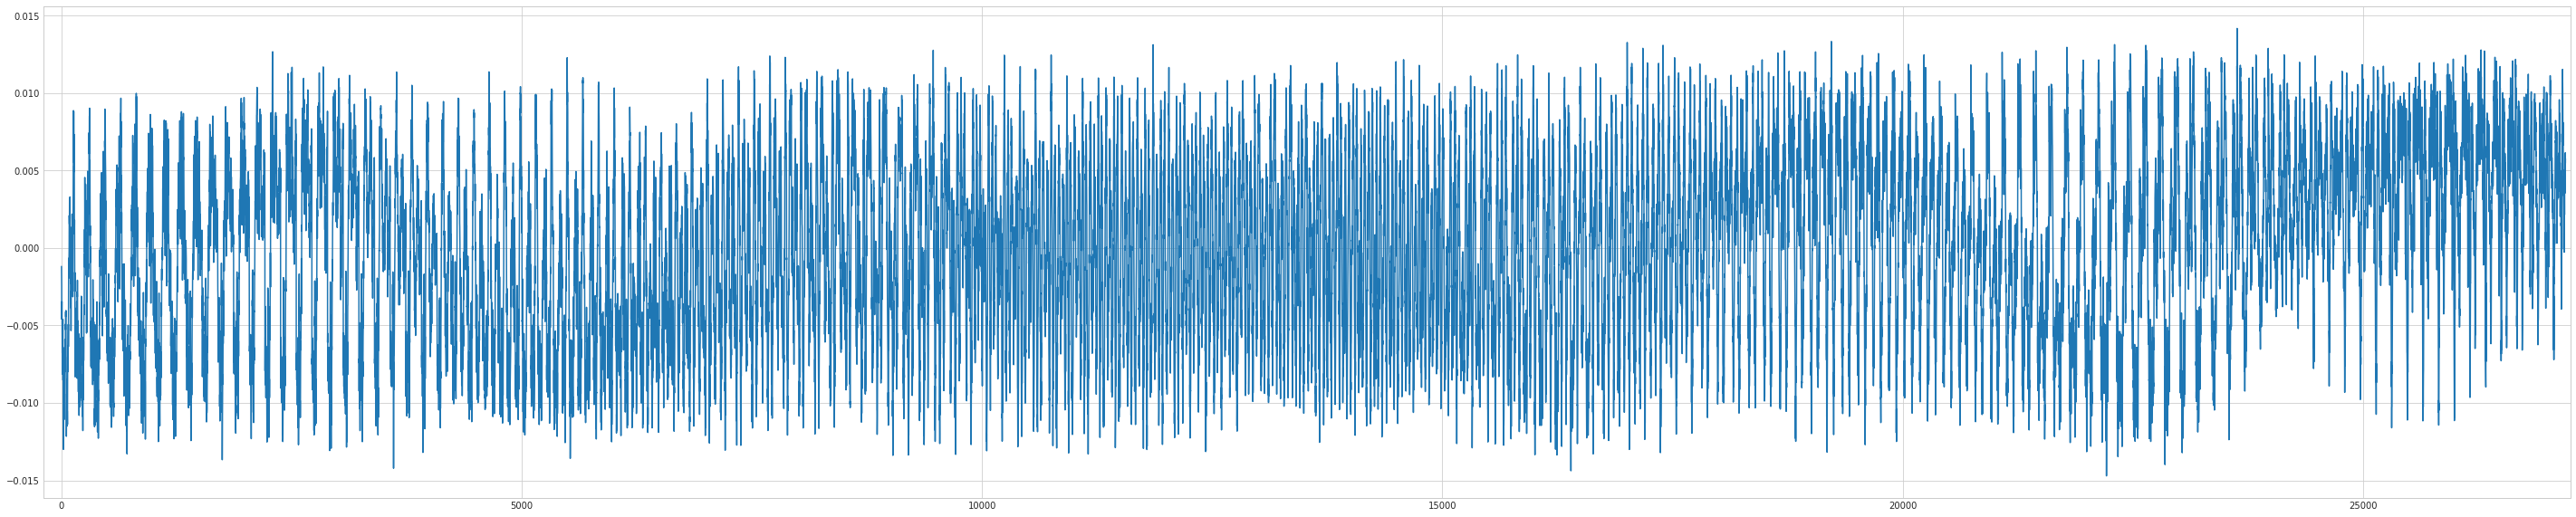

In [125]:
fig = plt.figure(figsize=(50, 10))
with plt.style.context('seaborn-whitegrid'):
    plt.plot(spatial_comp.transpose()[:, :1])
    plt.xlim(-200, 27250)
    # plt.savefig('reaction.png')
plt.show()


Какая красота
Кажется тут наложено много много синусоид друг на друга

In [126]:
one_signal = spatial_comp.transpose()[:, :1]


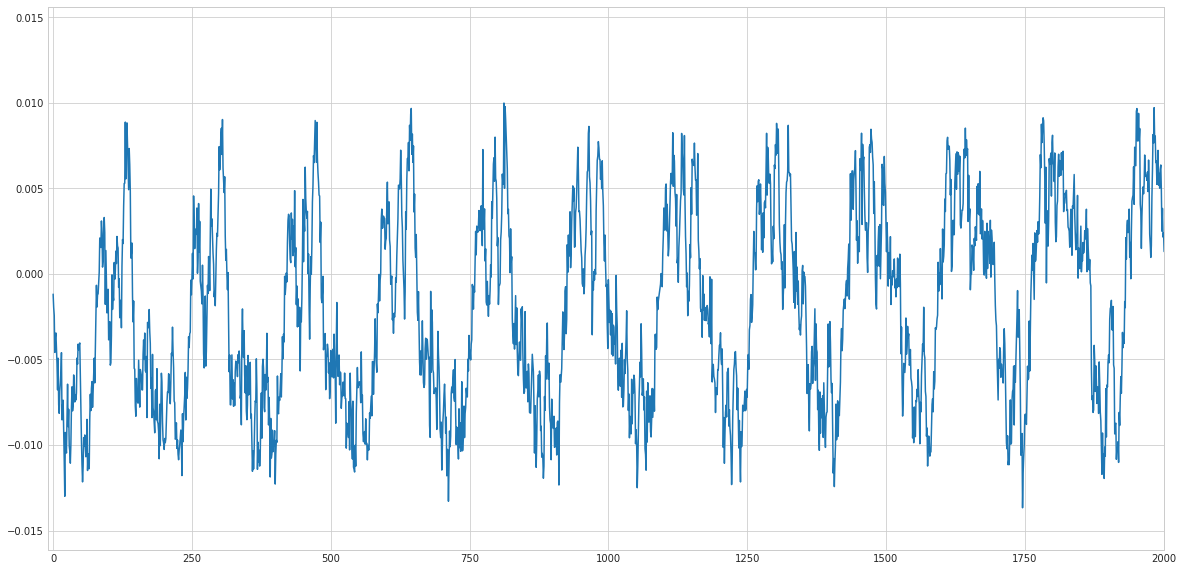

In [127]:
fig = plt.figure(figsize=(20, 10))
with plt.style.context('seaborn-whitegrid'):
    plt.plot(one_signal)
    plt.xlim(-10, 2000)
    # plt.savefig('reaction.png')
plt.show()

Очень хочется сделать FFT, но кажется моему FFT нужно свое FFT

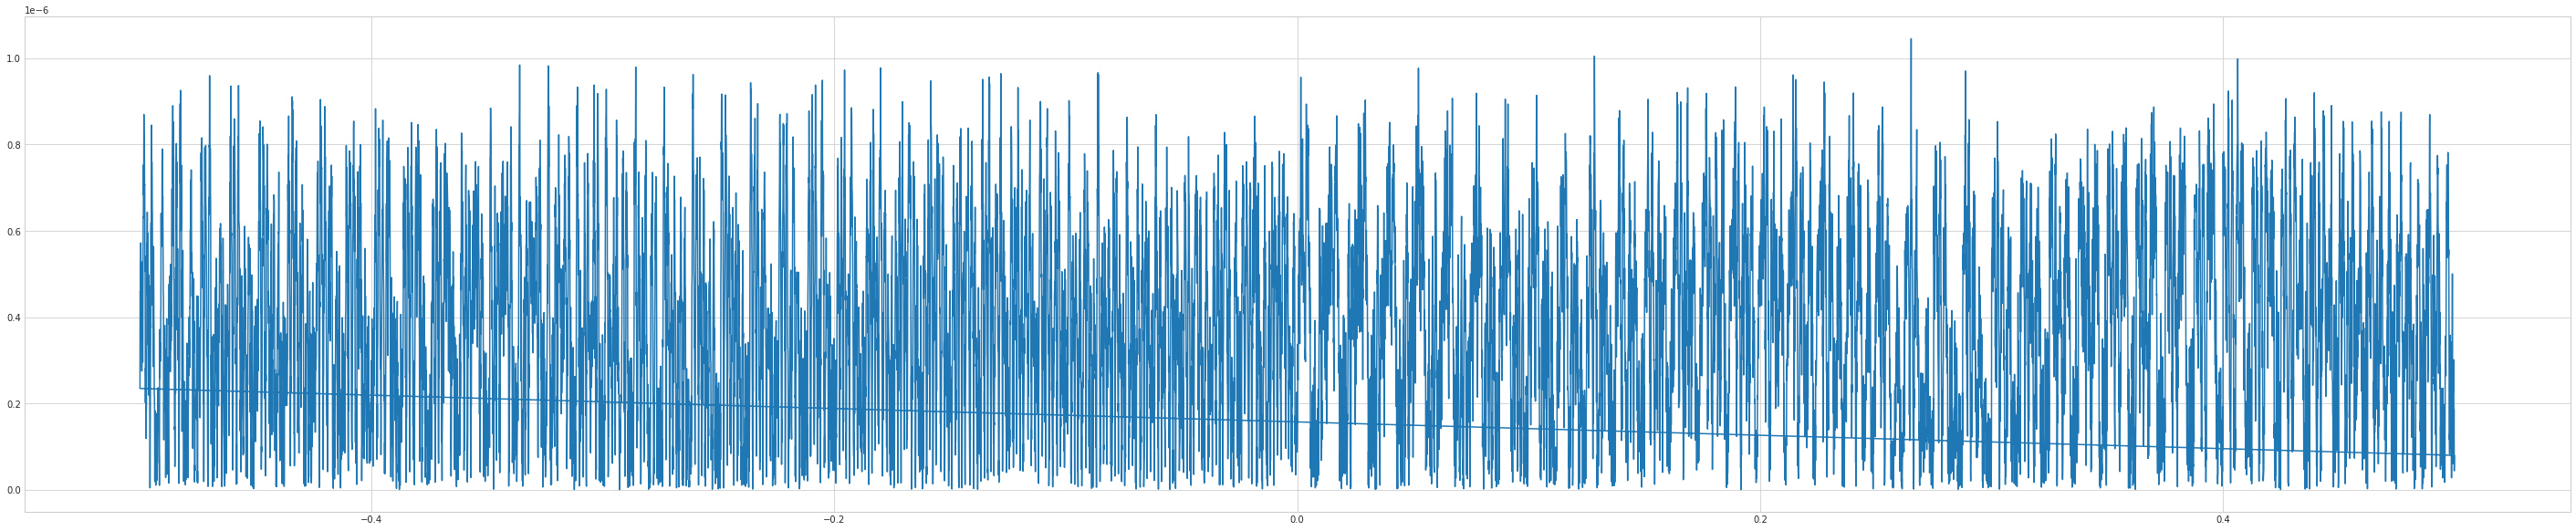

In [128]:
from matplotlib.cbook import open_file_cm
from scipy.fft import fft, fftfreq

N = one_signal.shape[0]
fig = plt.figure(figsize=(50, 10))
with plt.style.context('seaborn-whitegrid'):
    yf = fft(fft(one_signal))
    xf = fftfreq(len(yf)//2)
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    # plt.plot(xf, yf)
plt.show()



Не очень поняла, что имелось ввиду под 2D изображением

In [129]:
n = 100

In [130]:
x = np.linspace(0,n, 10*n)
y = one_signal[:10*n]

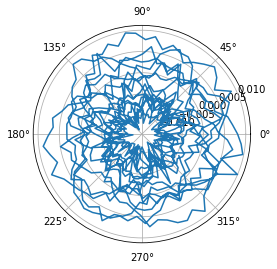

In [131]:
plt.polar(x, y)
plt.show()

## Реконструкция

Количество компонент

In [142]:
k=15

In [143]:
transformed_frames = time_comp[:, :k]*s[:k]

In [144]:
full_transformed_frames = transformed_frames.dot(spatial_comp[:k])

k = 3

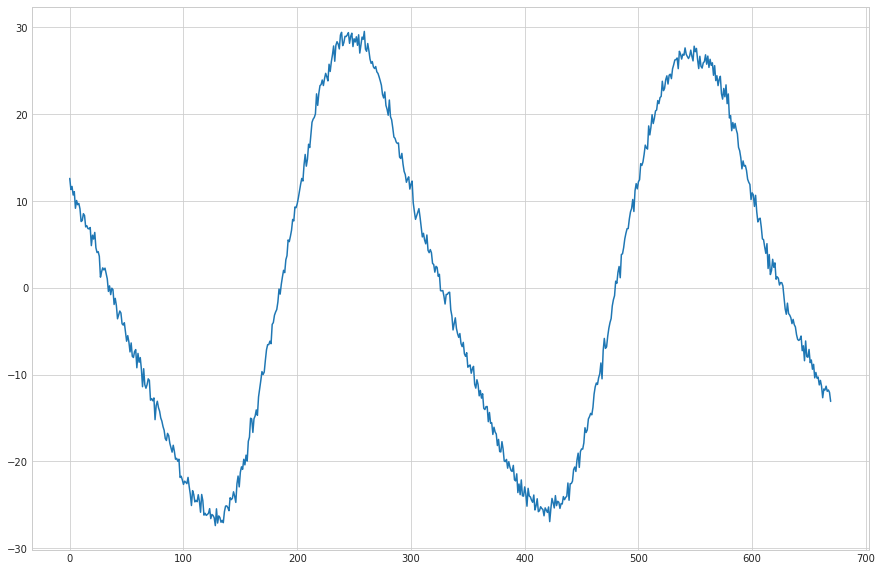

In [141]:
fig = plt.figure(figsize=(15, 10))
with plt.style.context('seaborn-whitegrid'):
    plt.plot(full_transformed_frames[:, :1])
plt.show()

k = 5

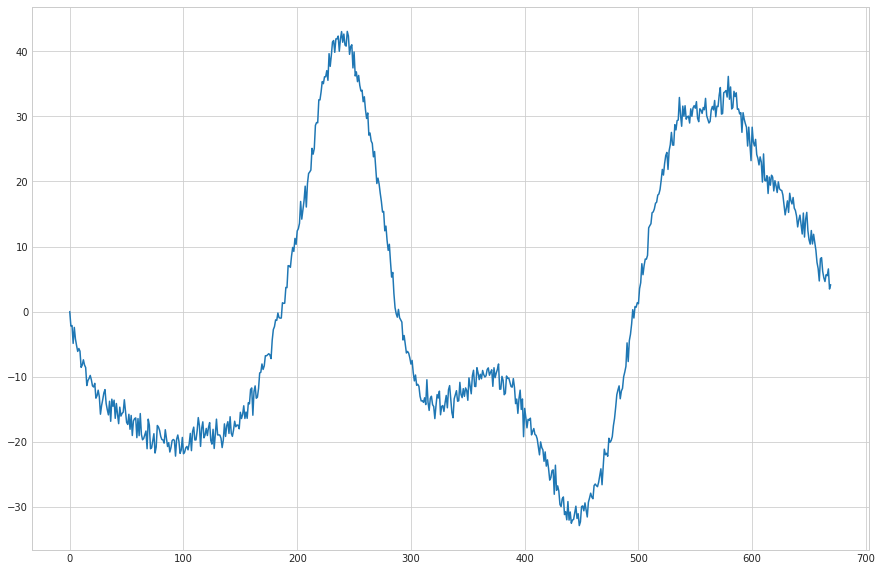

In [136]:
fig = plt.figure(figsize=(15, 10))
with plt.style.context('seaborn-whitegrid'):
    plt.plot(full_transformed_frames[:, :1])
plt.show()

k = 15

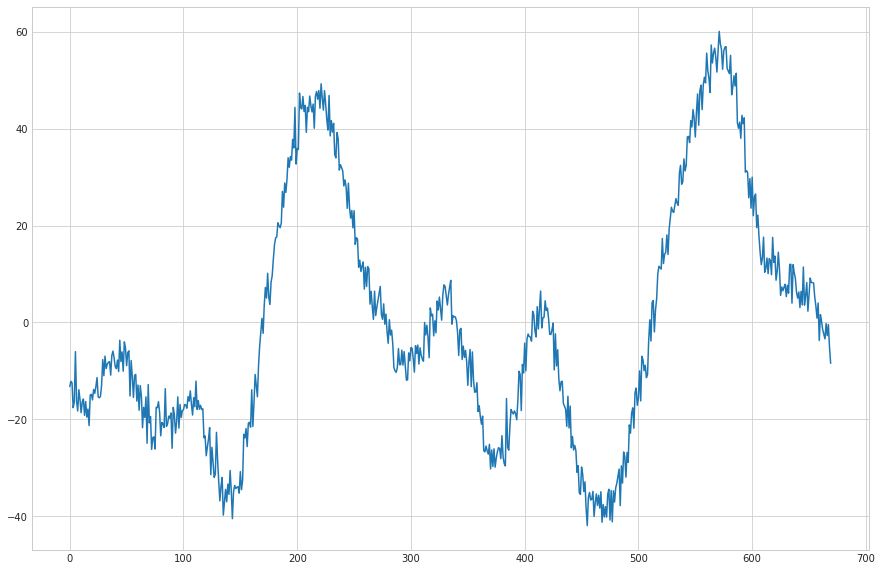

In [145]:
fig = plt.figure(figsize=(15, 10))
with plt.style.context('seaborn-whitegrid'):
    plt.plot(full_transformed_frames[:, :1])
plt.show()

Используя svd уменьшаем ддисперсию значенй с минимальной потерей информации